In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from scipy import stats
pd.options.display.max_columns = 999


C:\Users\semelit\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# data loading
df_price = pd.read_csv("time-series-fifa-master/data/player_price.csv")
df_stats = pd.read_csv("time-series-fifa-master/data/player_stats.csv")

In [3]:
from matplotlib import pyplot as plt
import matplotlib.animation as animation


import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [4]:
dates=df_stats.added_on.unique()


In [5]:
# filter by 1 player
df_st = df_stats[(df_stats["player_id"]==22)]
prices_d=df_st[['player_id']].merge(df_price, on=['player_id'], how='inner')

# convert timestamp to datetime
prices_d['Date'] = pd.to_datetime(prices_d['timestamp'], unit='ms')
prices_d.drop(["timestamp",'ps_price','player_id','player_name'], axis=1, inplace=True)

prices_d.rename(columns={'xbox_price': 'price'}, inplace=True)
#prices.set_index('Date', inplace=True)
prices_d.head()

,price,Date
0,244833,2016-09-23
1,223100,2016-09-24
2,218280,2016-09-25
3,222774,2016-09-26
4,213531,2016-09-27


In [103]:
prices = prices_d['price']
prices.index = prices_d.Date
prices.head()

Date
2016-09-23    244833
2016-09-24    223100
2016-09-25    218280
2016-09-26    222774
2016-09-27    213531
Name: price, dtype: int64

In [9]:
len(prices[prices==0])

0

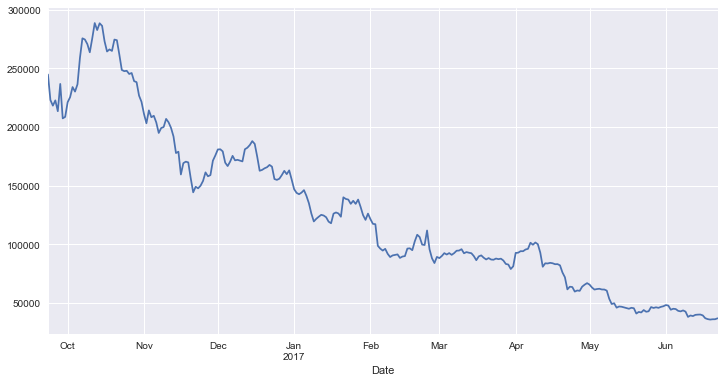

In [10]:
prices.plot(figsize=(12,6))

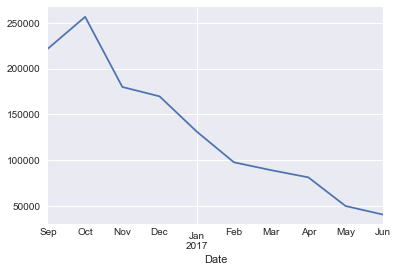

In [11]:
pricesW=prices.resample('M', how='mean')
pricesW.plot()

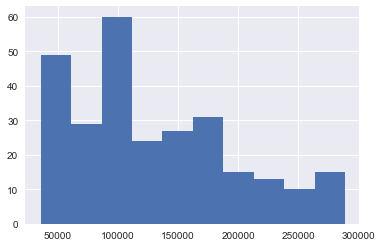

In [12]:
pricesW_d=pricesW.describe()
prices.hist()

In [13]:
import statsmodels.api as sm

test = sm.tsa.adfuller(pricesW)


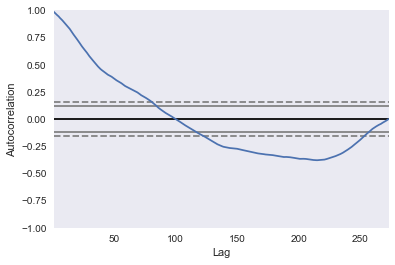

In [21]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(prices)

In [15]:
# код для отрисовки графиков
def tsplot(df, lags=None, figsize=(12, 7), style='bmh'):
   
    if not isinstance(df, pd.Series):
        y = df['price']
        y.index = df.Date
    else:
         y = df
            
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return

Критерий Дики-Фуллера: p=0.219336


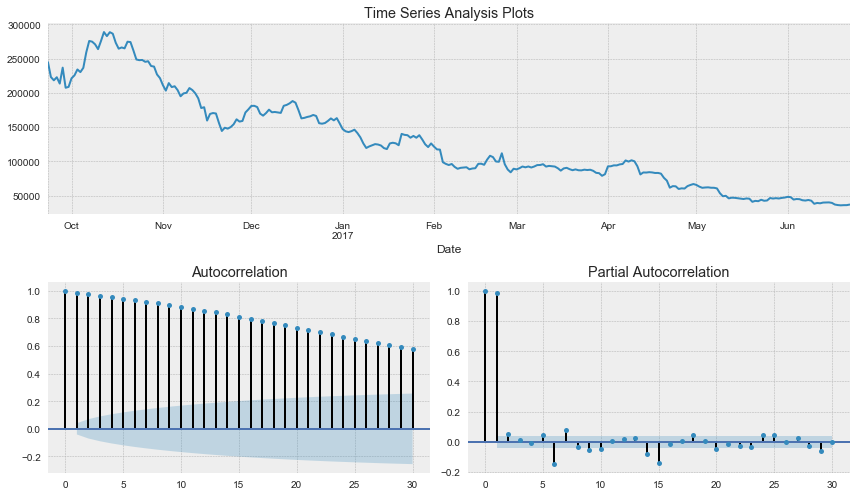

In [16]:
tsplot(prices,lags = 30)

In [76]:
len(prices[prices==0])

0

In [20]:
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(prices).plot()
pylab.show()

NameError: name 'figsize' is not defined

In [7]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print( dfoutput)

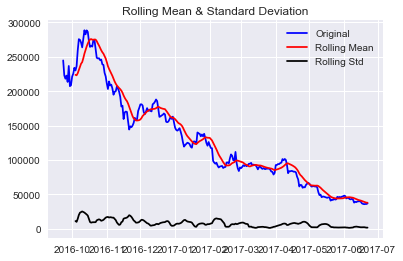

Results of Dickey-Fuller Test:
Test Statistic                  -2.164619
p-value                          0.219336
#Lags Used                      14.000000
Number of Observations Used    258.000000
Critical Value (5%)             -2.872809
Critical Value (1%)             -3.455953
Critical Value (10%)            -2.572775
dtype: float64


In [8]:
test_stationarity(prices)

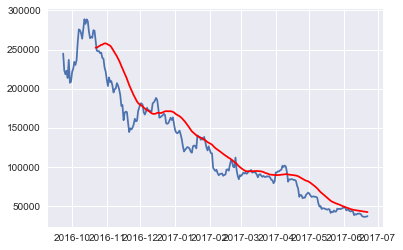

In [9]:
moving_avg = pd.rolling_mean(prices,30)
plt.plot(prices)
plt.plot(moving_avg, color='red')

In [10]:
ts_log_moving_avg_diff = prices - moving_avg
ts_log_moving_avg_diff.head(12)

Date
2016-09-23   NaN
2016-09-24   NaN
2016-09-25   NaN
2016-09-26   NaN
2016-09-27   NaN
2016-09-28   NaN
2016-09-29   NaN
2016-09-30   NaN
2016-10-01   NaN
2016-10-02   NaN
2016-10-03   NaN
2016-10-04   NaN
Name: price, dtype: float64

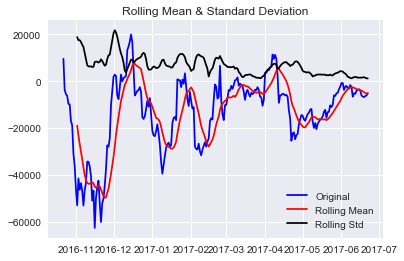

Results of Dickey-Fuller Test:
Test Statistic                  -3.735323
p-value                          0.003643
#Lags Used                       7.000000
Number of Observations Used    236.000000
Critical Value (5%)             -2.873866
Critical Value (1%)             -3.458366
Critical Value (10%)            -2.573339
dtype: float64


In [11]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

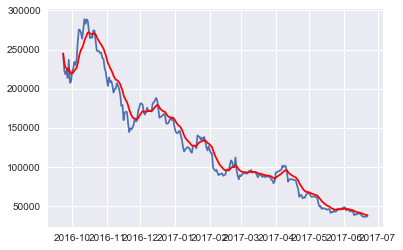

In [12]:
#exponentially weighted moving average

expwighted_avg = pd.ewma(prices, halflife=4)
plt.plot(prices)
plt.plot(expwighted_avg, color='red')

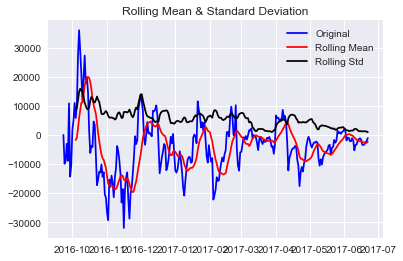

Results of Dickey-Fuller Test:
Test Statistic                  -4.767006
p-value                          0.000063
#Lags Used                      14.000000
Number of Observations Used    258.000000
Critical Value (5%)             -2.872809
Critical Value (1%)             -3.455953
Critical Value (10%)            -2.572775
dtype: float64


In [13]:
#remove this from series and check stationarity

ts_log_ewma_diff = prices - expwighted_avg
test_stationarity(ts_log_ewma_diff)

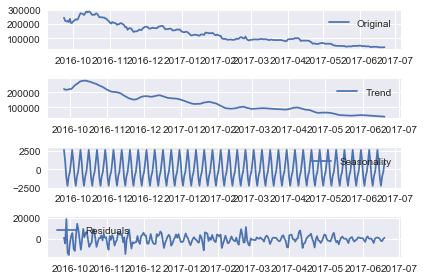

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(prices)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(prices, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

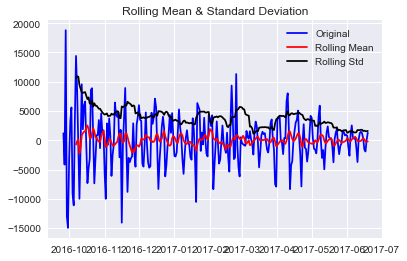

Results of Dickey-Fuller Test:
Test Statistic                -7.671126e+00
p-value                        1.592620e-11
#Lags Used                     1.000000e+01
Number of Observations Used    2.560000e+02
Critical Value (5%)           -2.872897e+00
Critical Value (1%)           -3.456155e+00
Critical Value (10%)          -2.572822e+00
dtype: float64


In [15]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

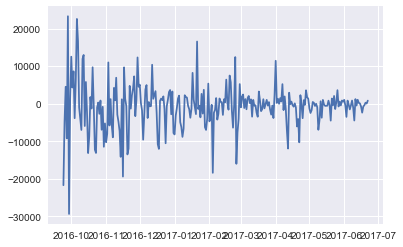

In [16]:
#Eliminating Trend and Seasonality
#Differencing

ts_log_diff = prices - prices.shift()
plt.plot(ts_log_diff)


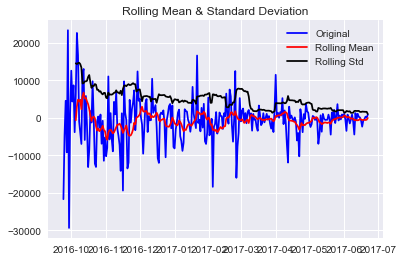

Results of Dickey-Fuller Test:
Test Statistic                  -4.905532
p-value                          0.000034
#Lags Used                      13.000000
Number of Observations Used    258.000000
Critical Value (5%)             -2.872809
Critical Value (1%)             -3.455953
Critical Value (10%)            -2.572775
dtype: float64


In [17]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

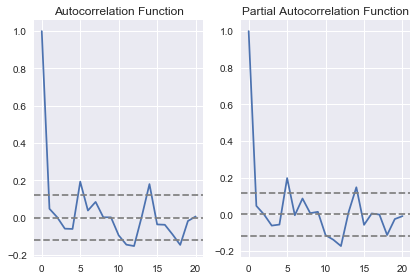

In [18]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

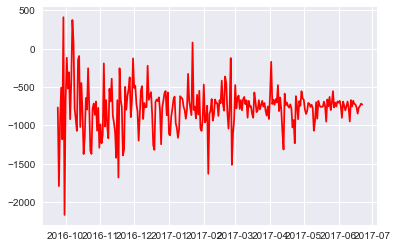

In [35]:
from statsmodels.tsa.arima_model import ARIMA

# ARIMA errors if not float

prices_f=prices.astype(float)

model = ARIMA(prices_f, order=(1, 1, 1))  

results_ARIMA = model.fit(disp=-1)   

plt.plot(results_ARIMA.fittedvalues, color='red')

In [102]:
print(results_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                  272
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2751.690
Method:                       css-mle   S.D. of innovations           5988.301
Date:                Sat, 01 Jul 2017   AIC                           5511.379
Time:                        01:25:07   BIC                           5525.802
Sample:                    09-24-2016   HQIC                          5517.170
                         - 06-22-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -767.3700    381.714     -2.010      0.045   -1515.517     -19.223
ar.L1.D.price     0.0482      0.671      0.072      0.943      -1.266       1.363
ma.L1.D.price     0.0007      0.669     

                  0
count    272.000000
mean       3.028892
std     5999.661676
min   -29797.574976
25%    -2285.739408
50%      349.875269
75%     2202.655285
max    24479.958536


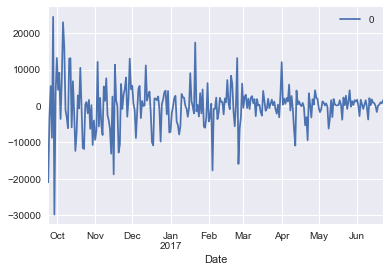

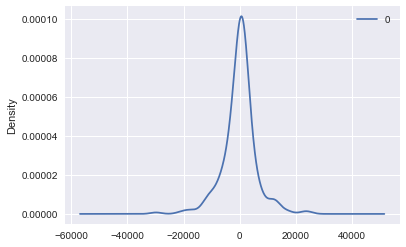

In [101]:
# plot residual errors
residuals = pd.DataFrame(results_ARIMA.resid)
residuals.plot()

residuals.plot(kind='kde')

print(residuals.describe())

In [95]:
prices.head()

Date
2016-09-23    244833
2016-09-24    223100
2016-09-25    218280
2016-09-26    222774
2016-09-27    213531
Name: price, dtype: int64

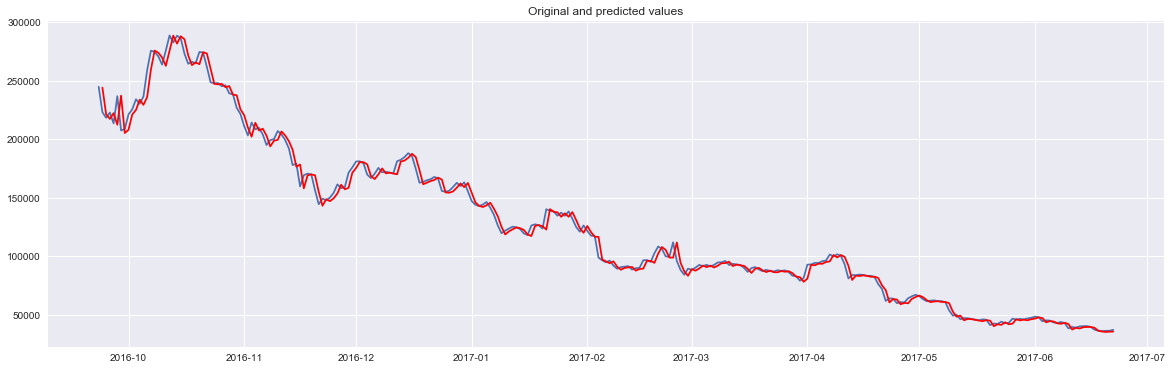

In [97]:
pred = results_ARIMA.predict('2016-09-24','2017-06-22', typ='levels')

plt.figure(figsize=(20,6))
plt.plot(prices_f)
plt.plot(pred, color='red')
plt.title('Original and predicted values')

In [92]:
#predict out of sample
pred_out=results_ARIMA.forecast(7)
dates=['2017-06-23','2017-06-24','2017-06-25','2017-06-26','2017-06-27','2017-06-28','2017-06-29']
pred_out_s = pd.Series(data=pred_out[0], index=dates)


In [91]:
pred_out

(array([ 36203.3359189 ,  35439.66268878,  34672.4708934 ,  33905.10952611,
         33137.73998655,  32370.37005314,  31603.00010076]),
 array([  5988.30095521,   8678.24198555,  10721.07643227,  12433.00600261,
         13936.21933434,  15292.37719575,  16537.69609764]),
 array([[ 24466.4817181 ,  47940.1901197 ],
        [ 18430.62094797,  52448.70442958],
        [ 13659.54721064,  55685.39457616],
        [  9536.86554142,  58273.35351079],
        [  5823.2520106 ,  60452.2279625 ],
        [  2397.86151148,  62342.87859481],
        [  -810.28863788,  64016.28883939]]))

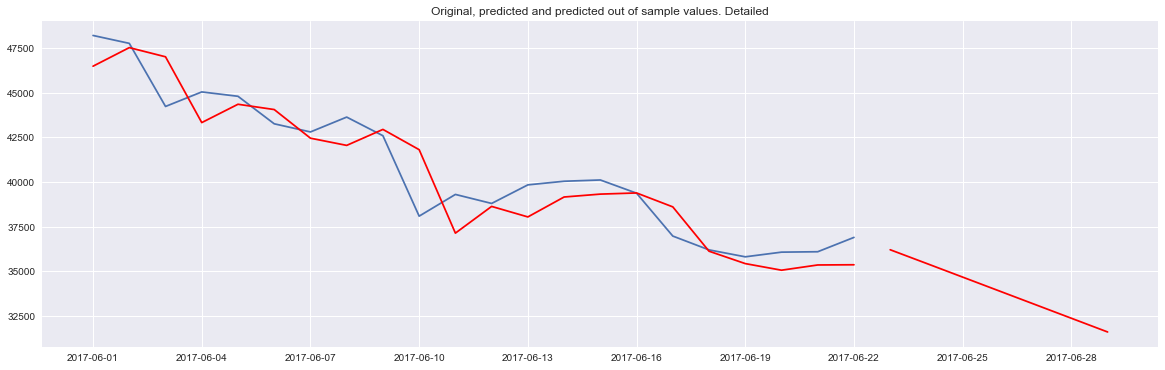

In [94]:
plt.figure(figsize=(20,6))
plt.plot(prices_f['2017-06-01':])
plt.plot(pred['2017-06-01':], color='red')
plt.plot(pred_out_s, color='red')
plt.title('Original, predicted and predicted out of sample values. Detailed')